# <center>36118 Applied Natural Language Processing</Center>


<H1><Center>Assignment 1 - Text Analysis of Australian Radio Talk Transcripts</center></H1>

<H2><Center>Submitted By : Jyoti Khurana (14075648)</center></H2>

 <H1>Introduction</H1>

Radio is a key medium for communication and media in influencing public opinion and reflecting social issues. The investigation examines 29 transcripts from radio talk in Australia. The collection consists of 15 transcripts from commercial stations and 14 from ABC National Radio, spanning different parts of Australia. In order to provide insights into geographical differences,  prevalent topics, and audience sentiment, our goal is to identify patterns, themes, and sentiments in these broadcasts.

Objective : 

1. Determine the Key Ideas: Recognize the most discussed subjects on various radio stations and regions.
2. Analyse Sentiment: Assess the overall tone these transcripts portray.
3. Examine regional variations: Examine content and sentiment differences between broadcasting regions and station types.

By providing these insights, we hope to educate researchers, policymakers, and media professionals on content dynamics in
Australian radio broadcasts. This data is essential for efficiently addressing regional concerns, determining audience
preferences, and customizing content.

<H1>Methodology</H2>

<H2>1. Data Loading and Preliminary data inspection</H2>

To start, we load the radio talk transcript dataset into a DataFrame. Every text file is accessed, and a DataFrame is used to hold its contents.


In [1]:
# Set warnings to "ignore" to keep the notebook clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import required libraries
import os
import pandas as pd
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string
import re
from nltk.corpus import stopwords

# Enable inline plotting
%matplotlib inline

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define the path to the dataset
data_path = r'C:\Users\jyoti\OneDrive\Desktop\AT1 dataset_AusRadioTalkback\AT1 dataset_AusRadioTalkback'

# Load the transcripts into a DataFrame
def load_transcripts(path):
    files = [f for f in os.listdir(path) if f.endswith('.txt')]
    transcripts = []
    for file in files:
        with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
            content = f.read()
            transcripts.append({
                'filename': file,
                'content': content
            })
    return pd.DataFrame(transcripts)

df = load_transcripts(data_path)
df.head()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,filename,content
0,1_Dataset Description.txt,Name\n\nAustralian Radio Talkback\n\nDescripti...
1,ABCE1-plain.txt,Thanks for that John Hall now John Hall will ...
2,ABCE2-plain.txt,Ah look l Les Pete.\n.\n Simon.\n G'day Peto....
3,ABCE3-plain.txt,If you haven't been with us before this how i...
4,ABCE4-plain.txt,Uh blue-tongues'd be unlikely to eat them be...


A word cloud is generated to visualize the most frequently occurring words in the transcripts. It offers a visual representation in which the frequency of each word is shown by its size.

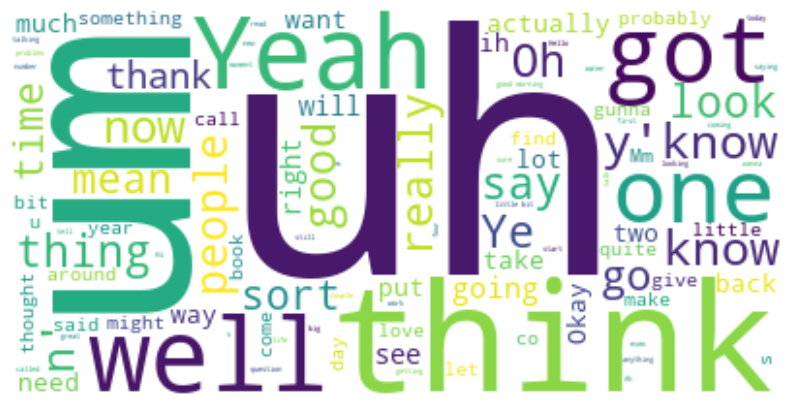

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all transcript texts into one string
article_text = ' '.join(df['content'])

# Create a word cloud
wordcloud = WordCloud(max_words=100, background_color='white').generate(article_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



Bigram and Trigram Analysis: From the tokenized words, bigrams and trigrams are extracted in order to analyse the common phrases or collocations. These are word groups that usually consist of two or three words.

In [4]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize text data
df['tokens'] = df['content'].apply(word_tokenize)

# Generate bigrams and trigrams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Apply bigram and trigram generation
df['bigrams'] = df['tokens'].apply(lambda x: generate_ngrams(x, 2))
df['trigrams'] = df['tokens'].apply(lambda x: generate_ngrams(x, 3))

# Flatten the lists and count n-grams
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]
all_trigrams = [trigram for sublist in df['trigrams'] for trigram in sublist]

bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

# Convert frequencies to DataFrames
bigram_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False)
trigram_df = pd.DataFrame(trigram_freq.items(), columns=['Trigram', 'Frequency']).sort_values(by='Frequency', ascending=False)


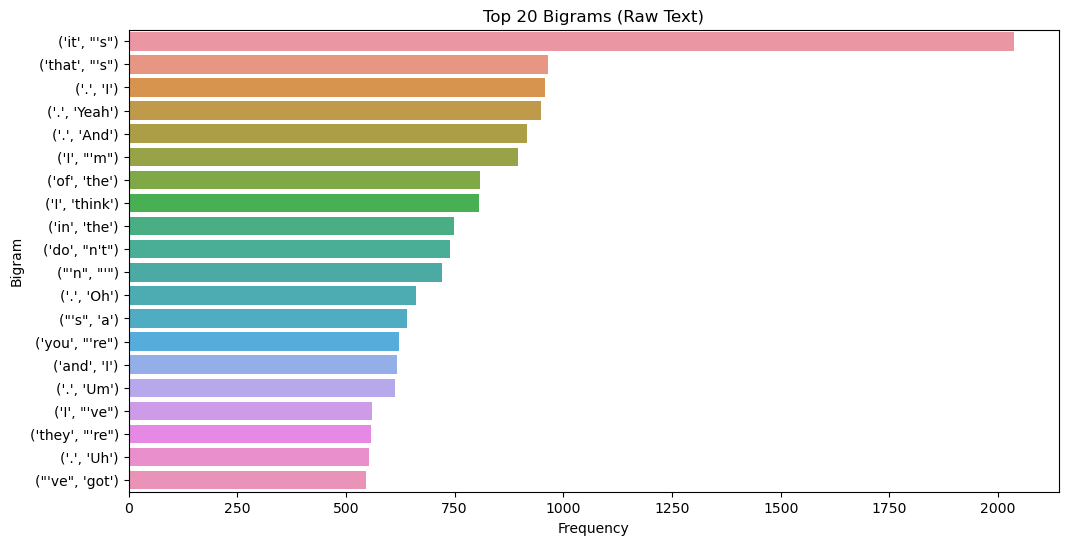

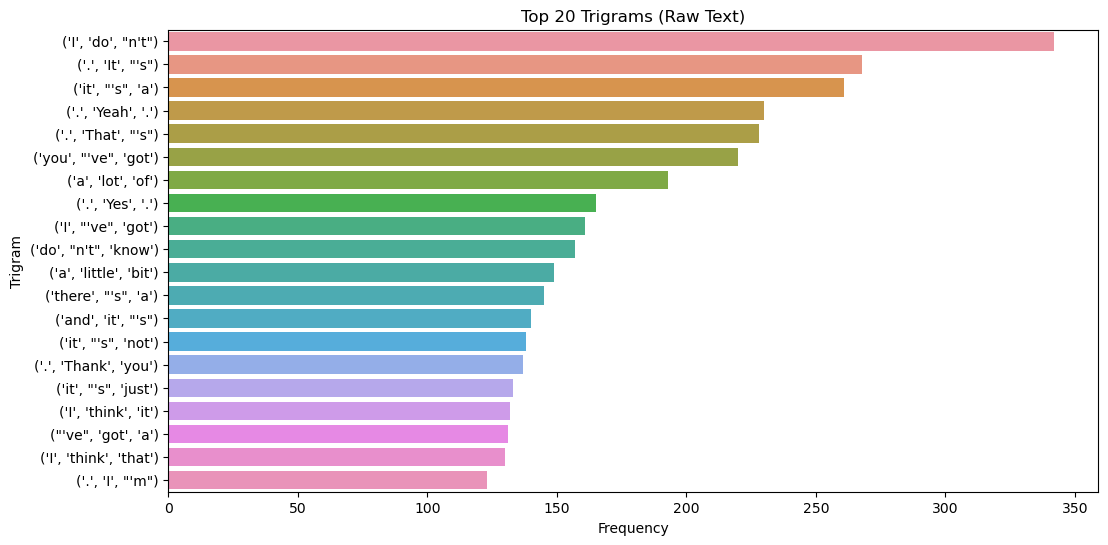

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df.head(20))
plt.title('Top 20 Bigrams (Raw Text)')
plt.show()

# Plot trigrams
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Trigram', data=trigram_df.head(20))
plt.title('Top 20 Trigrams (Raw Text)')
plt.show()


Let's see what the most collocated words in our text 

In [8]:
# Flatten tokens for BigramCollocationFinder
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Bigram Collocation Finder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_tokens)

# Find and print top 20 bigrams using likelihood ratio
top_bigrams = finder.nbest(bigram_measures.likelihood_ratio, 20)
print(top_bigrams)


[("'n", "'"), ('it', "'s"), ('I', "'m"), ('.', 'Yeah'), ('.', 'And'), ('do', "n't"), ("'ve", 'got'), ('I', 'think'), ('.', 'Oh'), ('sort', 'of'), ('.', 'Um'), ('they', "'re"), ('.', 'Uh'), ('.', 'Well'), ('.', 'Yes'), ('wan', 'na'), ('.', 'It'), ('that', "'s"), ('you', "'re"), ('I', 'mean')]


Concordance - A tool for text analysis that locates and shows the context in which a specific word or phrase appears in a text is a concordance. It facilitates comprehension of a word's usage in a variety of situations by highlighting relationships and patterns that might not be apparent from isolated instances.

In [10]:
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Combine all transcript texts into one string
all_text = ' '.join(df['content'])

# Tokenize the combined text
tokenized_words = word_tokenize(all_text)

# Create NLTK Text object
textlist = Text(tokenized_words)

# Print the Text object to confirm it's created
print(textlist)

# Find and display concordances for the word 'bucks'
textlist.concordance('bucks')

# Find and display concordances for the word 'bucks' with specific width and number of lines
textlist.concordance('bucks', width=100, lines=10)


<Text: Name Australian Radio Talkback Description It includes 14...>
Displaying 8 of 8 matches:
nd I think it 's children free three bucks to get in ten till three-thirty uh a
 well I think adults are about three bucks children two bucks but you do need t
s are about three bucks children two bucks but you do need to book and the phon
a triangle and says that 'll be nine bucks thanks . Y yeah . That 's right . Ye
 silver ribbon buy one costs you two bucks but it might well be the best two do
out this race-horse will you put ten bucks each way on it or what . Well he he 
to flog it off for a couple of extra bucks . And are you gunna have a D V D com
ntly just trying to get the last few bucks together so they can get the plane f
Displaying 8 of 8 matches:
ghth one and I think it 's children free three bucks to get in ten till three-thirty uh also anothe
tasting as well I think adults are about three bucks children two bucks but you do need to book and
hink adults are about three bucks chi

<H2>2. Preprocessing the text</H2>

Text preprocessing is an essential stage in natural language processing (NLP) and text analysis. It entails converting unformatted text into one that is simpler to deal with and analyze. Tokenization, sentiment analysis, and topic modeling will all perform more accurately and effectively if the text is clear and standardized, as ensured by this stage.

In [11]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['processed_content'] = df['content'].apply(preprocess_text)
df.head()


,filename,content,tokens,bigrams,trigrams,processed_content
0,1_Dataset Description.txt,Name\n\nAustralian Radio Talkback\n\nDescripti...,"[Name, Australian, Radio, Talkback, Descriptio...","[(Name, Australian), (Australian, Radio), (Rad...","[(Name, Australian, Radio), (Australian, Radio...",name australian radio talkback description inc...
1,ABCE1-plain.txt,Thanks for that John Hall now John Hall will ...,"[Thanks, for, that, John, Hall, now, John, Hal...","[(Thanks, for), (for, that), (that, John), (Jo...","[(Thanks, for, that), (for, that, John), (that...",thanks john hall john hall listening next hour...
2,ABCE2-plain.txt,Ah look l Les Pete.\n.\n Simon.\n G'day Peto....,"[Ah, look, l, Les, Pete., ., Simon, ., G'day, ...","[(Ah, look), (look, l), (l, Les), (Les, Pete.)...","[(Ah, look, l), (look, l, Les), (l, Les, Pete....",ah look l les pete simon gday peto simo gday l...
3,ABCE3-plain.txt,If you haven't been with us before this how i...,"[If, you, have, n't, been, with, us, before, t...","[(If, you), (you, have), (have, n't), (n't, be...","[(If, you, have), (you, have, n't), (have, n't...",havent us functions jurate sasnaitis joins us ...
4,ABCE4-plain.txt,Uh blue-tongues'd be unlikely to eat them be...,"[Uh, blue-tongues, 'd, be, unlikely, to, eat, ...","[(Uh, blue-tongues), (blue-tongues, 'd), ('d, ...","[(Uh, blue-tongues, 'd), (blue-tongues, 'd, be...",uh bluetonguesd unlikely eat good old uh hemid...


 <H3>Basic Dataset Information and Description</H3>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   filename           30 non-null     object
 1   content            30 non-null     object
 2   tokens             30 non-null     object
 3   bigrams            30 non-null     object
 4   trigrams           30 non-null     object
 5   processed_content  30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [13]:
df.describe()

,filename,content,tokens,bigrams,trigrams,processed_content
count,30,30,30,30,30,30
unique,30,30,30,30,30,30
top,1_Dataset Description.txt,Name\n\nAustralian Radio Talkback\n\nDescripti...,"[Name, Australian, Radio, Talkback, Descriptio...","[(Name, Australian), (Australian, Radio), (Rad...","[(Name, Australian, Radio), (Australian, Radio...",name australian radio talkback description inc...
freq,1,1,1,1,1,1


In [14]:
df.head(10)

,filename,content,tokens,bigrams,trigrams,processed_content
0,1_Dataset Description.txt,Name\n\nAustralian Radio Talkback\n\nDescripti...,"[Name, Australian, Radio, Talkback, Descriptio...","[(Name, Australian), (Australian, Radio), (Rad...","[(Name, Australian, Radio), (Australian, Radio...",name australian radio talkback description inc...
1,ABCE1-plain.txt,Thanks for that John Hall now John Hall will ...,"[Thanks, for, that, John, Hall, now, John, Hal...","[(Thanks, for), (for, that), (that, John), (Jo...","[(Thanks, for, that), (for, that, John), (that...",thanks john hall john hall listening next hour...
2,ABCE2-plain.txt,Ah look l Les Pete.\n.\n Simon.\n G'day Peto....,"[Ah, look, l, Les, Pete., ., Simon, ., G'day, ...","[(Ah, look), (look, l), (l, Les), (Les, Pete.)...","[(Ah, look, l), (look, l, Les), (l, Les, Pete....",ah look l les pete simon gday peto simo gday l...
3,ABCE3-plain.txt,If you haven't been with us before this how i...,"[If, you, have, n't, been, with, us, before, t...","[(If, you), (you, have), (have, n't), (n't, be...","[(If, you, have), (you, have, n't), (have, n't...",havent us functions jurate sasnaitis joins us ...
4,ABCE4-plain.txt,Uh blue-tongues'd be unlikely to eat them be...,"[Uh, blue-tongues, 'd, be, unlikely, to, eat, ...","[(Uh, blue-tongues), (blue-tongues, 'd), ('d, ...","[(Uh, blue-tongues, 'd), (blue-tongues, 'd, be...",uh bluetonguesd unlikely eat good old uh hemid...
5,ABCNE1-plain.txt,A very good afternoon to you Roly.\n Good aft...,"[A, very, good, afternoon, to, you, Roly, ., G...","[(A, very), (very, good), (good, afternoon), (...","[(A, very, good), (very, good, afternoon), (go...",good afternoon roly good afternoon sir mm good...
6,ABCNE2-plain.txt,And Greg Kerrin is my guest. Hello Greg.\n G'...,"[And, Greg, Kerrin, is, my, guest, ., Hello, G...","[(And, Greg), (Greg, Kerrin), (Kerrin, is), (i...","[(And, Greg, Kerrin), (Greg, Kerrin, is), (Ker...",greg kerrin guest hello greg gday trevor well ...
7,COME1-plain.txt,Good morning and welcome to another Two G B w...,"[Good, morning, and, welcome, to, another, Two...","[(Good, morning), (morning, and), (and, welcom...","[(Good, morning, and), (morning, and, welcome)...",good morning welcome another two g b weekend o...
8,COME2-plain.txt,Good morning everyone and welcome to a very f...,"[Good, morning, everyone, and, welcome, to, a,...","[(Good, morning), (morning, everyone), (everyo...","[(Good, morning, everyone), (morning, everyone...",good morning everyone welcome foggy sort overc...
9,COME3-plain.txt,The doctor is in the lines are open one-three...,"[The, doctor, is, in, the, lines, are, open, o...","[(The, doctor), (doctor, is), (is, in), (in, t...","[(The, doctor, is), (doctor, is, in), (is, in,...",doctor lines open onethreeoneeightseventhree t...


<H2>3. Exploratory Data Analysis</H2?

Word Frequency Analysis after preprocessing - Identified the most common words to highlight key topics.

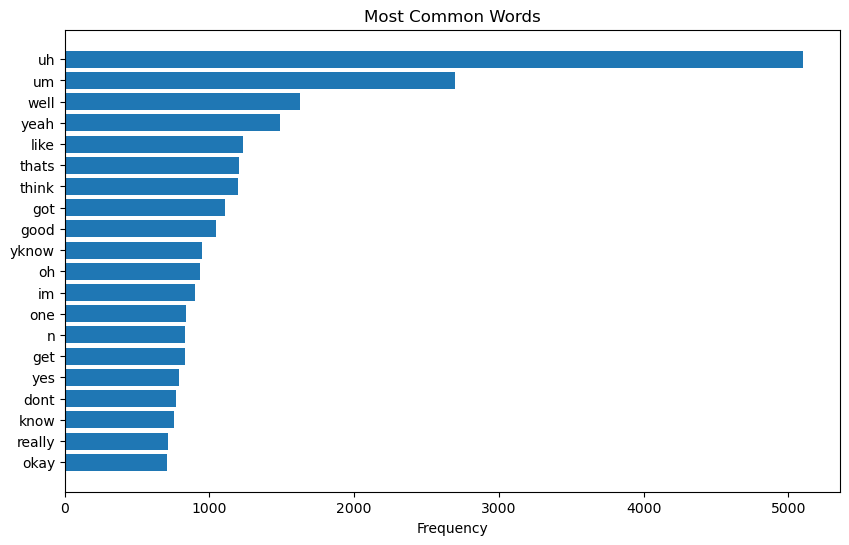

In [15]:
# Combine all processed texts
all_text = ' '.join(df['processed_content'])
tokens = word_tokenize(all_text)

# Count word frequencies
word_freq = Counter(tokens)
most_common_words = word_freq.most_common(20)
most_common_words

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.barh([word for word, _ in most_common_words], [count for _, count in most_common_words])
plt.xlabel('Frequency')
plt.title('Most Common Words')
plt.gca().invert_yaxis()
plt.show()


Word Cloud Visualization -  A word cloud is a type of visual representation of text data in which the prominence or frequency of a word within the text is indicated by its size. A word cloud created both before and after preprocessing can be used to see how terms are distributed and how prominent they are in your dataset. After processing data , it looks like below

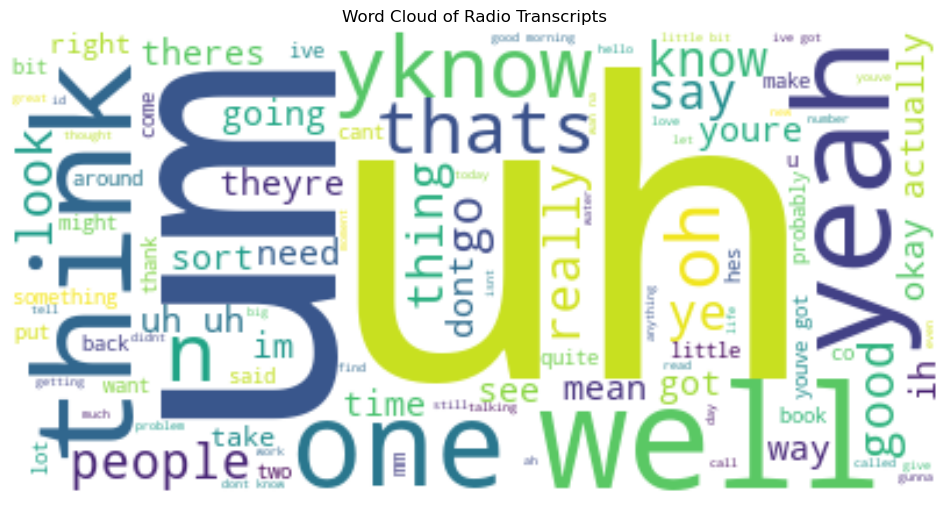

In [16]:
wordcloud = WordCloud(max_words=100, background_color='white').generate(all_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Radio Transcripts')
plt.show()

<H2>4. Topic Modelling</H2>

Latent Dirichlet Allocation (LDA) is used to find the text's underlying subjects. This method aids in the division of conversations into discrete themes.
This probabilistic model assumes each document is a mixture of topics and each topic is a mixture of words.  We can determine the most common subjects and the important terms related to each topic by fitting the model.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_content'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-no_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(f"Topic {topic_idx + 1}: {' '.join(top_words)}")
    return topics

feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, 10)
topics


['Topic 1: uh um well yeah like thats think yknow good got',
 'Topic 2: uh well yeah um thats think im dont know good',
 'Topic 3: uh um well yeah got think like oh thats good',
 'Topic 4: via macquarie collection creator comne accessible griffith adapt redistribute revoke',
 'Topic 5: via macquarie collection creator comne accessible griffith adapt redistribute revoke']

Regional Word Frequency - We explored word frequencies across different locations to understand regional differences in content.

In [18]:
# Filter data by region/station
abc_national = df[df['filename'].str.contains('NAT', case=False, na=False)]
commercial_east = df[df['filename'].str.contains('COME', case=False, na=False)]
abc_southwest = df[df['filename'].str.contains('ABCNE', case=False, na=False)]
commercial_southwest = df[df['filename'].str.contains('COMNE', case=False, na=False)]

# Print the number of records in each subset
print(f"ABC National records: {abc_national.shape[0]}")
print(f"Commercial East records: {commercial_east.shape[0]}")
print(f"ABC South/West records: {abc_southwest.shape[0]}")
print(f"Commercial South/West records: {commercial_southwest.shape[0]}")



ABC National records: 8
Commercial East records: 8
ABC South/West records: 2
Commercial South/West records: 7


Preprocessing the data , visualizing the word counts and showing them on a word cloud based on different regions

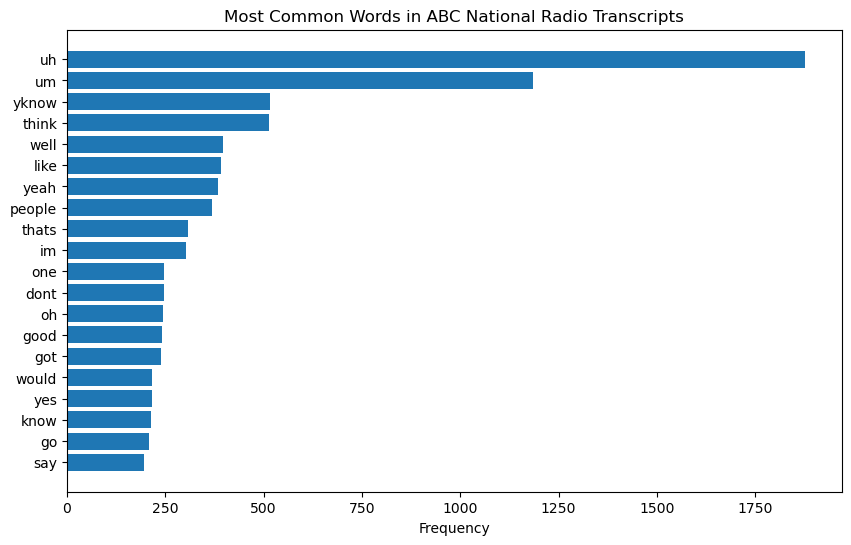

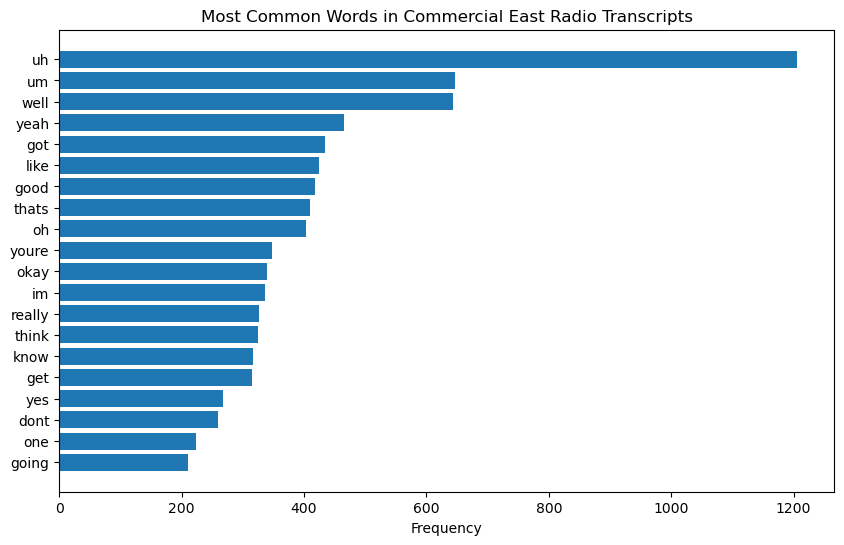

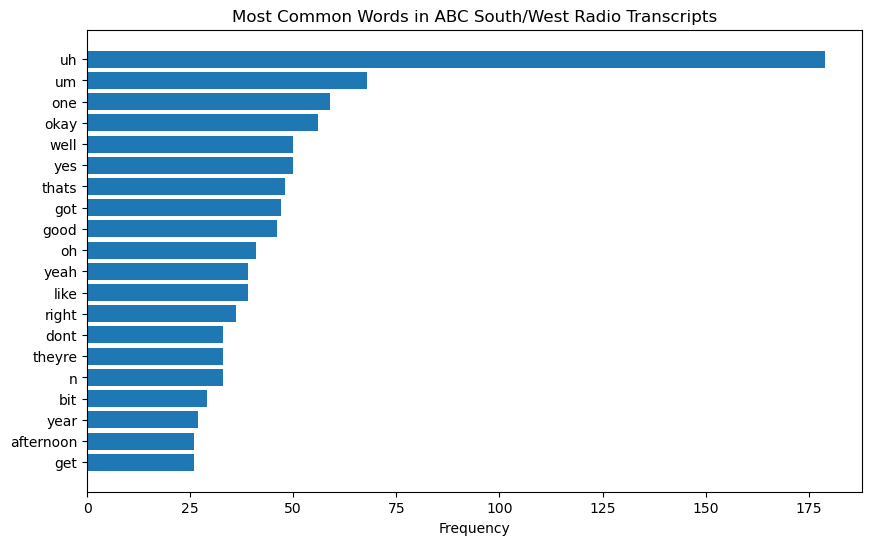

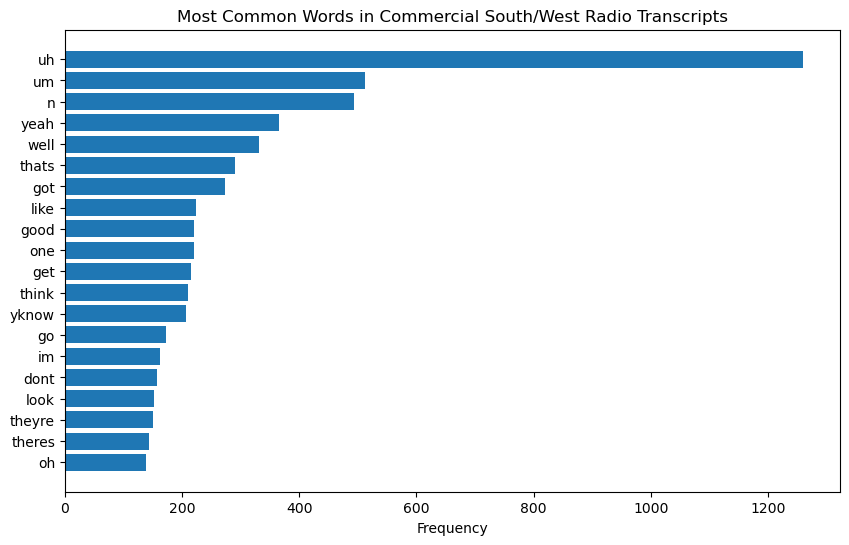

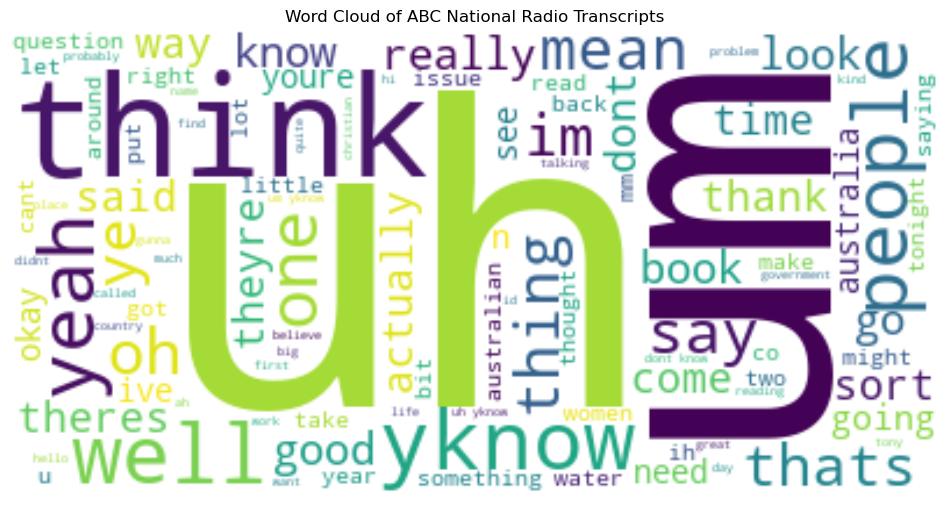

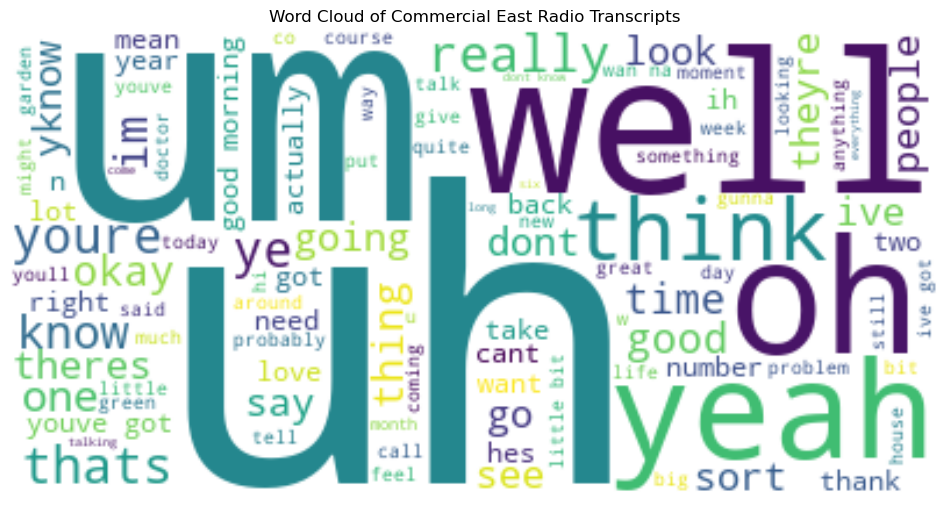

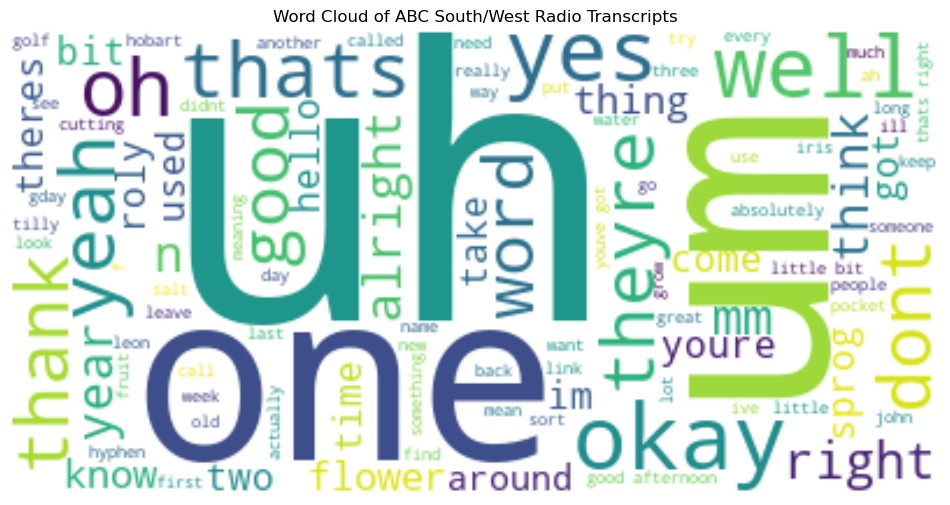

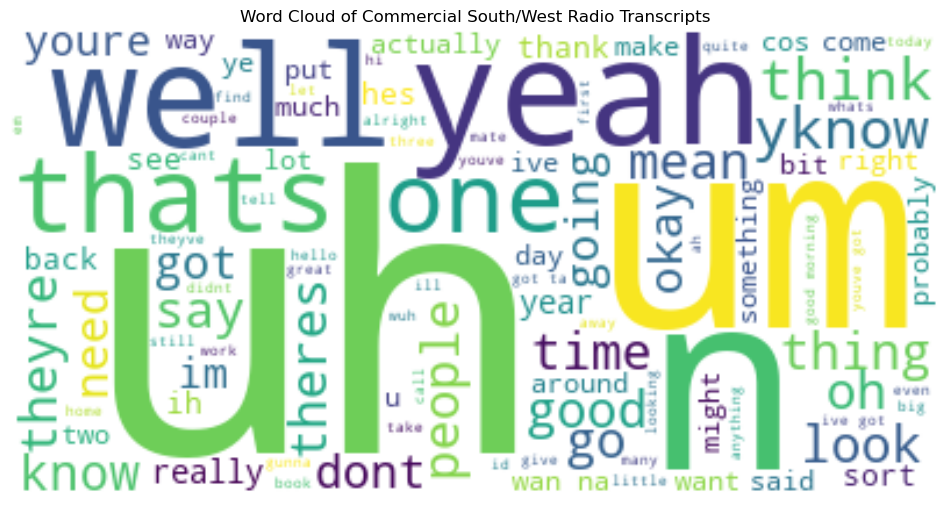

In [19]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply preprocessing
abc_national['processed_content'] = abc_national['content'].apply(preprocess_text)
commercial_east['processed_content'] = commercial_east['content'].apply(preprocess_text)
abc_southwest['processed_content'] = abc_southwest['content'].apply(preprocess_text)
commercial_southwest['processed_content'] = commercial_southwest['content'].apply(preprocess_text)

# Combine all processed texts
abc_national_text = ' '.join(abc_national['processed_content'])
commercial_east_text = ' '.join(commercial_east['processed_content'])
abc_southwest_text = ' '.join(abc_southwest['processed_content'])
commercial_southwest_text = ' '.join(commercial_southwest['processed_content'])

# Word Frequency Analysis for each subset
def plot_word_frequencies(text, title):
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    most_common_words = word_freq.most_common(20)

    plt.figure(figsize=(10, 6))
    plt.barh([word for word, _ in most_common_words], [count for _, count in most_common_words])
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot the most common words for each subset
plot_word_frequencies(abc_national_text, 'Most Common Words in ABC National Radio Transcripts')
plot_word_frequencies(commercial_east_text, 'Most Common Words in Commercial East Radio Transcripts')
plot_word_frequencies(abc_southwest_text, 'Most Common Words in ABC South/West Radio Transcripts')
plot_word_frequencies(commercial_southwest_text, 'Most Common Words in Commercial South/West Radio Transcripts')

# Word Cloud Visualization for each subset
def plot_word_cloud(text, title):
    wordcloud = WordCloud(max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds for each subset
plot_word_cloud(abc_national_text, 'Word Cloud of ABC National Radio Transcripts')
plot_word_cloud(commercial_east_text, 'Word Cloud of Commercial East Radio Transcripts')
plot_word_cloud(abc_southwest_text, 'Word Cloud of ABC South/West Radio Transcripts')
plot_word_cloud(commercial_southwest_text, 'Word Cloud of Commercial South/West Radio Transcripts')


<H2>5. Sentiment Analysis</H2>

Sentiment analysis is a method for determining the sentiment or emotional tone that is communicated in a text. It is frequently used to assess attitudes, sentiments, and views towards subjects or entities in text data.It is done using the SentimentIntensityAnalyzer from NLTK.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


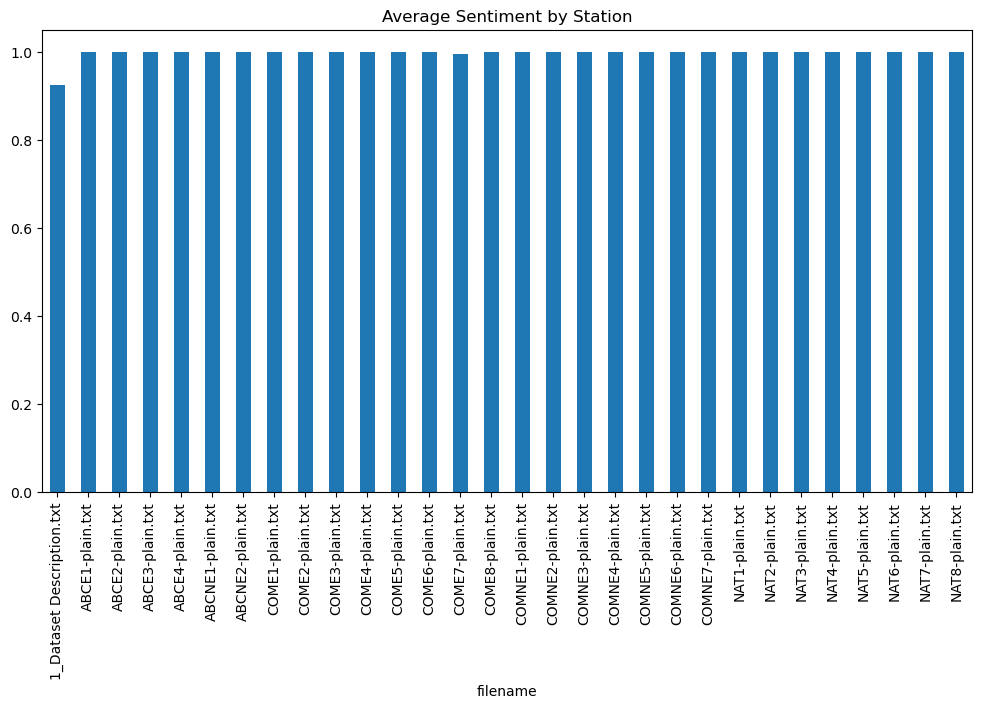

In [20]:
# Sentiment Analysis
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

df['sentiment'] = df['processed_content'].apply(get_sentiment)

# Calculate average sentiment per station
avg_sentiment = df.groupby('filename')['sentiment'].mean()
avg_sentiment.plot(kind='bar', figsize=(12, 6), title='Average Sentiment by Station')
plt.show()


<H2>6. N-gram Analysis </H2>

To further explore the context of discussions, we analyzed bigrams (two-word combinations) and trigrams (three-word combinations).

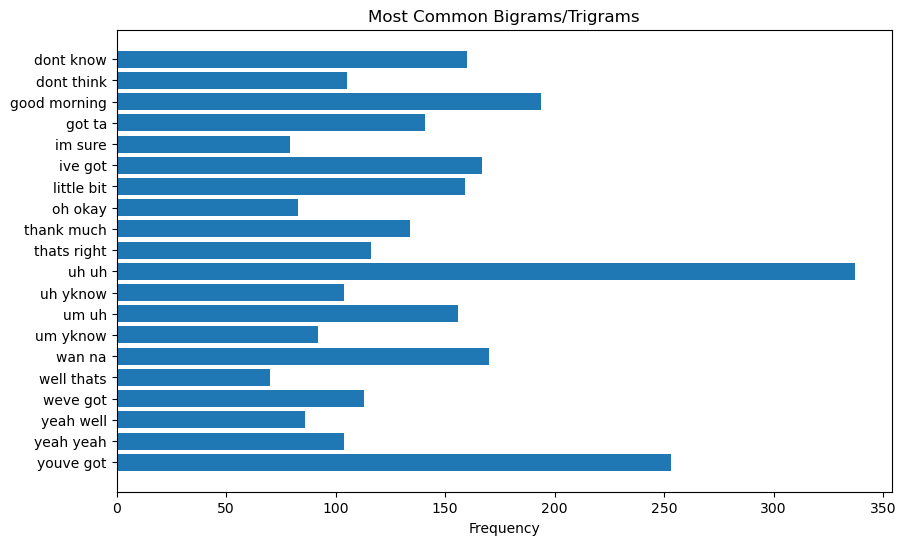

In [21]:
# N-gram analysis
vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=20)
X = vectorizer.fit_transform(df['processed_content'])
ngrams = vectorizer.get_feature_names_out()
ngram_freq = X.toarray().sum(axis=0)

plt.figure(figsize=(10, 6))
plt.barh(ngrams, ngram_freq)
plt.xlabel('Frequency')
plt.title('Most Common Bigrams/Trigrams')
plt.gca().invert_yaxis()
plt.show()


dont know: 160
dont think: 105
good morning: 194
got ta: 141
im sure: 79
ive got: 167
little bit: 159
oh okay: 83
thank much: 134
thats right: 116
uh uh: 337
uh yknow: 104
um uh: 156
um yknow: 92
wan na: 170
well thats: 70
weve got: 113
yeah well: 86
yeah yeah: 104
youve got: 253


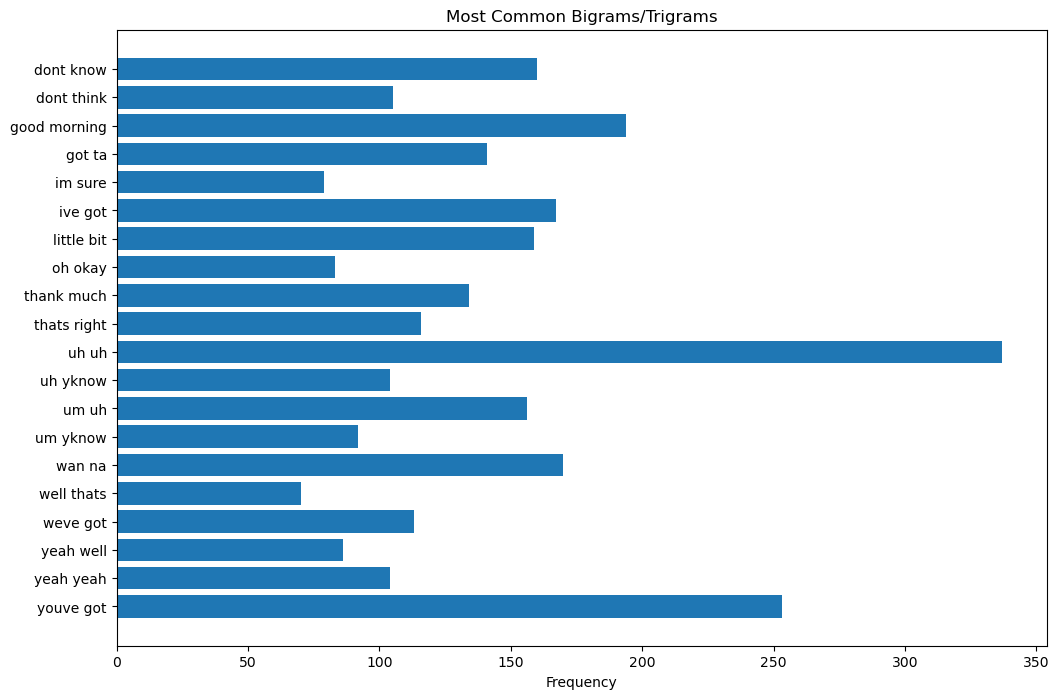

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Vectorize text data
vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=20)
X = vectorizer.fit_transform(df['processed_content'])
ngrams = vectorizer.get_feature_names_out()
ngram_freq = X.toarray().sum(axis=0)

# Print n-grams and their frequencies
for ngram, freq in zip(ngrams, ngram_freq):
    print(f"{ngram}: {freq}")

# Plot the most common bigrams and trigrams
plt.figure(figsize=(12, 8))
plt.barh(ngrams, ngram_freq)
plt.xlabel('Frequency')
plt.title('Most Common Bigrams/Trigrams')
plt.gca().invert_yaxis()
plt.show()


<H2>7. POS Analysis and Tagging </H2>

In order to examine the distribution of various grammatical tags (such as nouns, verbs, and adjectives) in the dataset, Part-of-Speech (POS) tagging is applied to the text.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


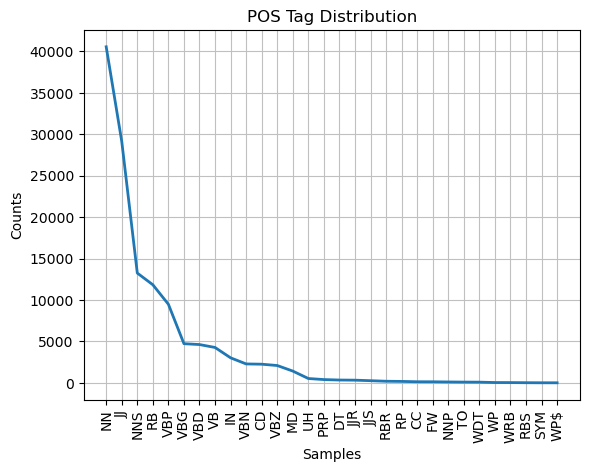

<AxesSubplot:title={'center':'POS Tag Distribution'}, xlabel='Samples', ylabel='Counts'>

In [23]:
# Tagging and Analysis
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag

def pos_analysis(text):
    tokens = word_tokenize(text)
    tags = pos_tag(tokens)
    tag_fd = nltk.FreqDist(tag for (word, tag) in tags)
    return tag_fd

pos_counts = pos_analysis(all_text)
pos_counts.plot(30, title='POS Tag Distribution')


<H2>8. Named Entity Recognition (NER)</H2>

In this section, Named Entity Recognition (NER) is performed using SpaCy, which involves extracting entities such as people, places, organizations, and monetary values from the text. This aids in comprehending important concepts discussed in the literature.

In [24]:
import pandas as pd
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Define entity extraction function
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply the function to the complete DataFrame
df['entities'] = df['processed_content'].apply(lambda text: extract_entities(text) if pd.notnull(text) else [])

# Check the result
print(df[['processed_content', 'entities']])


                                    processed_content  \
0   name australian radio talkback description inc...   
1   thanks john hall john hall listening next hour...   
2   ah look l les pete simon gday peto simo gday l...   
3   havent us functions jurate sasnaitis joins us ...   
4   uh bluetonguesd unlikely eat good old uh hemid...   
5   good afternoon roly good afternoon sir mm good...   
6   greg kerrin guest hello greg gday trevor well ...   
7   good morning welcome another two g b weekend o...   
8   good morning everyone welcome foggy sort overc...   
9   doctor lines open onethreeoneeightseventhree t...   
10  morning mark uh uh good morning john um yeah i...   
11  heres sharinas saturday nights positive vibe g...   
12  talking long takes install stuff im little ann...   
13  program g p dr sally cockburn good morning mor...   
14  mix oneohsixpointfive love course love lines o...   
15  freo dockers skipper peter bell hello everyone...   
16  good afternoon howard sattl

In [25]:
import pandas as pd
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Define entity extraction function
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Sample DataFrame
data = {'processed_content': ["Apple is looking at buying U.K. startup for $1 billion", 
                                 "Microsoft acquired LinkedIn for $26.2 billion", 
                                "Tesla is a leading electric vehicle manufacturer"]}

df = pd.DataFrame(data)

# Apply the function to the DataFrame
df['entities'] = df['processed_content'].apply(lambda text: extract_entities(text) if pd.notnull(text) else [])

# Check the result
print(df[['processed_content', 'entities']])


                                   processed_content  \
0  Apple is looking at buying U.K. startup for $1...   
1      Microsoft acquired LinkedIn for $26.2 billion   
2   Tesla is a leading electric vehicle manufacturer   

                                            entities  
0   [(Apple, ORG), (U.K., GPE), ($1 billion, MONEY)]  
1  [(Microsoft, ORG), (LinkedIn, GPE), ($26.2 bil...  
2                                     [(Tesla, ORG)]  


<H2>9.Entity Type Distribution </H2>



Understanding the distribution of various entity types within the dataset is useful after utilizing SpaCy to extract named entities. We make a bar chart in this section to show how frequently each entity type occurs.

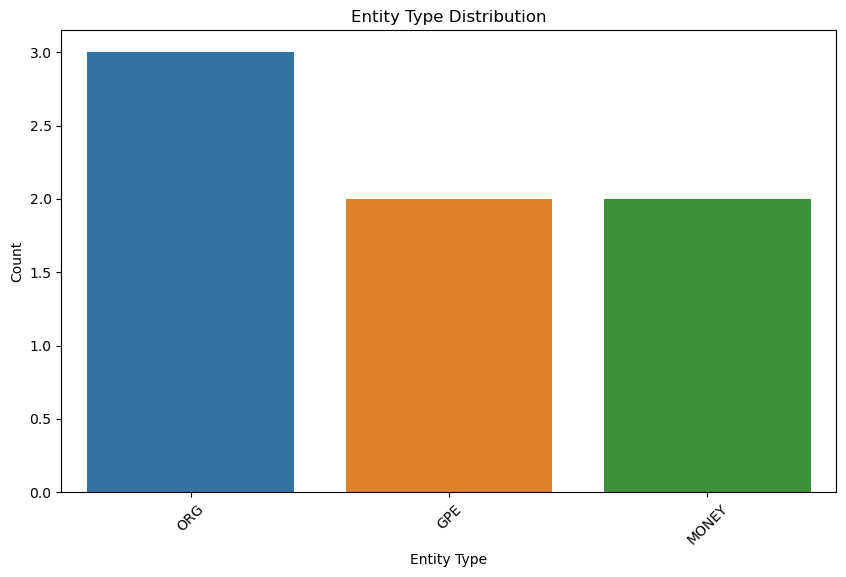

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the list of entities and count occurrences
from collections import Counter
entity_list = [ent for sublist in df['entities'] for ent in sublist]
entity_counter = Counter(ent[1] for ent in entity_list)

# Convert to DataFrame for plotting
entity_df = pd.DataFrame(entity_counter.items(), columns=['Entity Type', 'Count'])

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Entity Type', y='Count', data=entity_df)
plt.xticks(rotation=45)
plt.title('Entity Type Distribution')
plt.show()


<H2>10. Bigram Network Graph</H2>


Bigrams, or pairs of consecutive words, can provide significant associations in text data. In this section, we create a network graph to see the connection between the most frequent bigrams in the dataset.

In [27]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Combine all processed texts
all_text = ' '.join(df['processed_content'])

# Tokenize the combined text
tokens = word_tokenize(all_text)


In [28]:
from nltk import bigrams
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Generate bigrams
bi_grams = list(bigrams(tokens))

# Count bigram frequencies
bigram_freq = Counter(bi_grams)


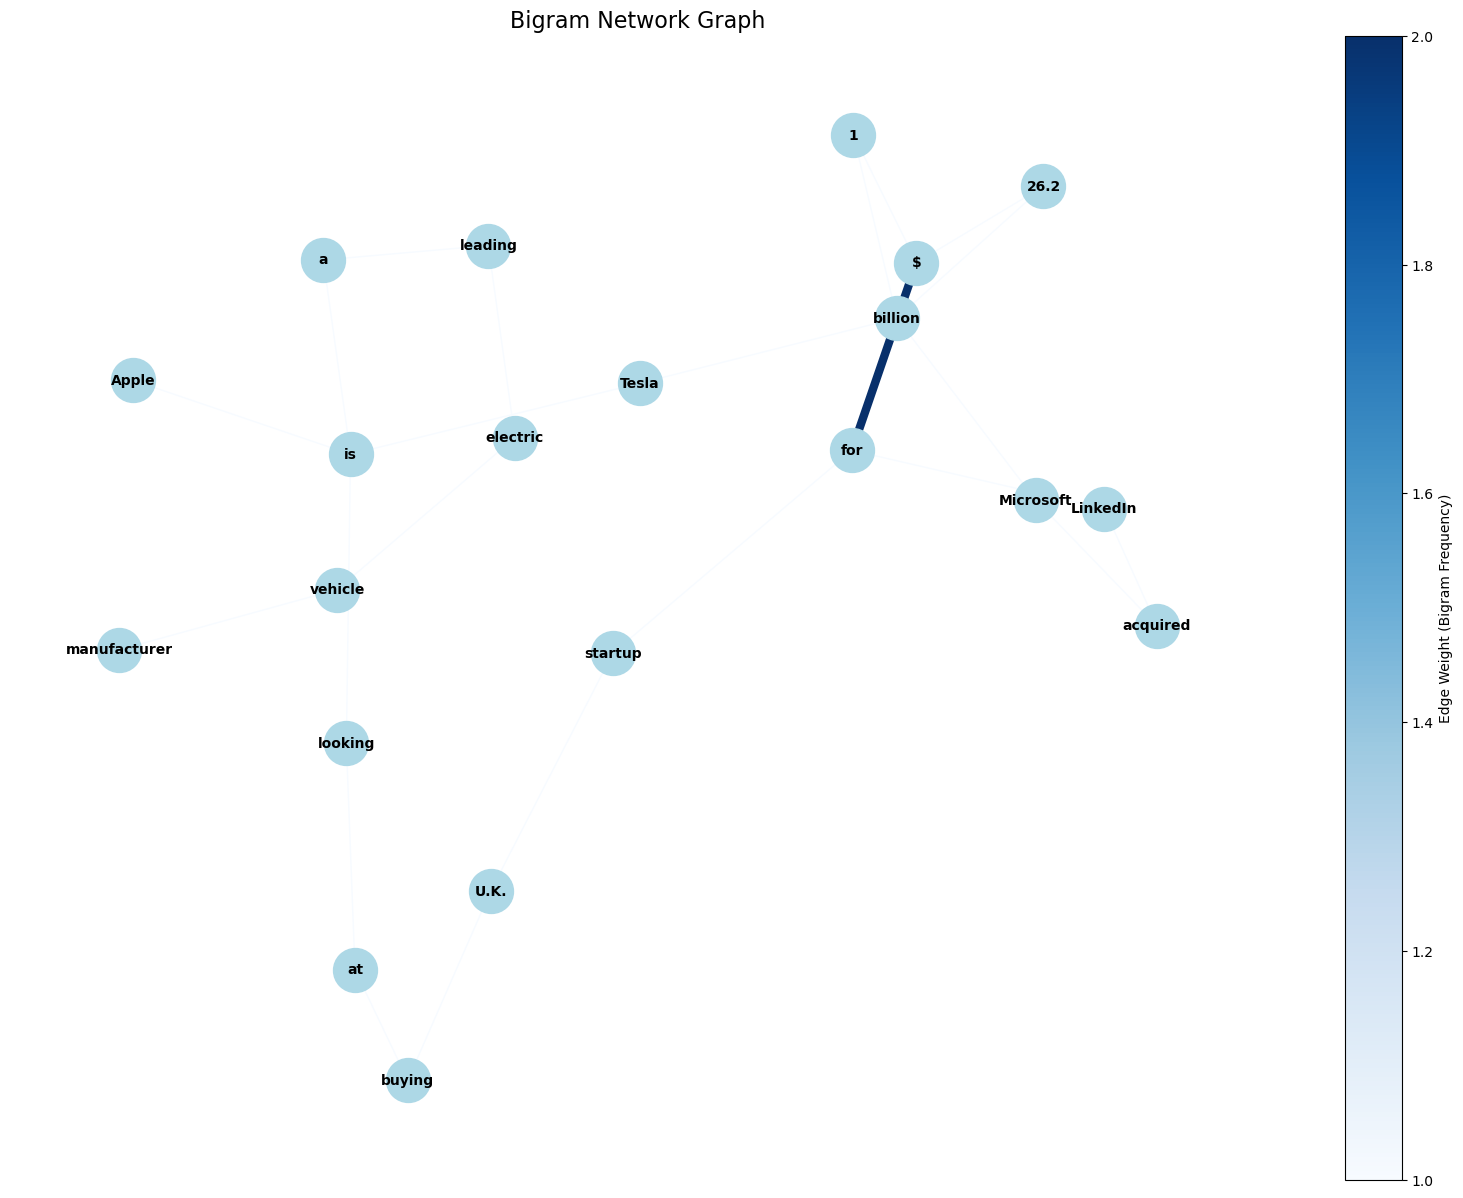

In [29]:
def plot_bigram_network(tokens, n=60):
    # Generate bigrams
    bi_grams = list(bigrams(tokens))
    
    # Count bigram frequencies
    bigram_freq = Counter(bi_grams)
    
    # Create network graph
    G = nx.Graph()
    
    # Initialize edge properties
    edge_width = []
    edge_color = []
    for bigram, count in bigram_freq.most_common(n):
        G.add_edge(bigram[0], bigram[1], weight=count)
        edge_width.append(count)
        edge_color.append(count)
    
    # Normalize edge widths
    edge_width = np.array(edge_width)
    edge_width = 1 + (edge_width - edge_width.min()) * 5 / (edge_width.max() - edge_width.min())
    
    # Plot the network
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
    
    plt.title('Bigram Network Graph', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    
    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_color), vmax=max(edge_color)))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Edge Weight (Bigram Frequency)', fontsize=10)
    
    plt.show()

# Call the function with your tokens
plot_bigram_network(tokens)


<H2>11. Topic Modelling </H2>

Topic modeling is a technique to determine abstract topics that occur in a set of documents. In this part, we apply Latent Dirichlet Allocation (LDA) to extract topics from the text data. We will use Term Frequency-Inverse Document Frequency (TF-IDF) to vectorize the text data before applying LDA.

Top words per topic:
Topic 0: 26 acquired linkedin microsoft electric leading manufacturer tesla vehicle billion
Topic 1: 26 acquired linkedin microsoft electric leading manufacturer tesla vehicle billion
Topic 2: billion electric leading manufacturer tesla vehicle 26 acquired linkedin microsoft
Topic 3: 26 acquired linkedin microsoft electric leading manufacturer tesla vehicle billion
Topic 4: 26 acquired linkedin microsoft electric leading manufacturer tesla vehicle billion
Topic 5: 26 acquired linkedin microsoft electric leading manufacturer tesla vehicle billion
Topic 6: 26 acquired linkedin microsoft electric leading manufacturer tesla vehicle billion
Topic 7: 26 acquired linkedin microsoft electric leading manufacturer tesla vehicle billion
Topic 8: 26 acquired linkedin microsoft electric leading manufacturer tesla vehicle billion
Topic 9: electric leading manufacturer tesla vehicle billion apple buying looking startup


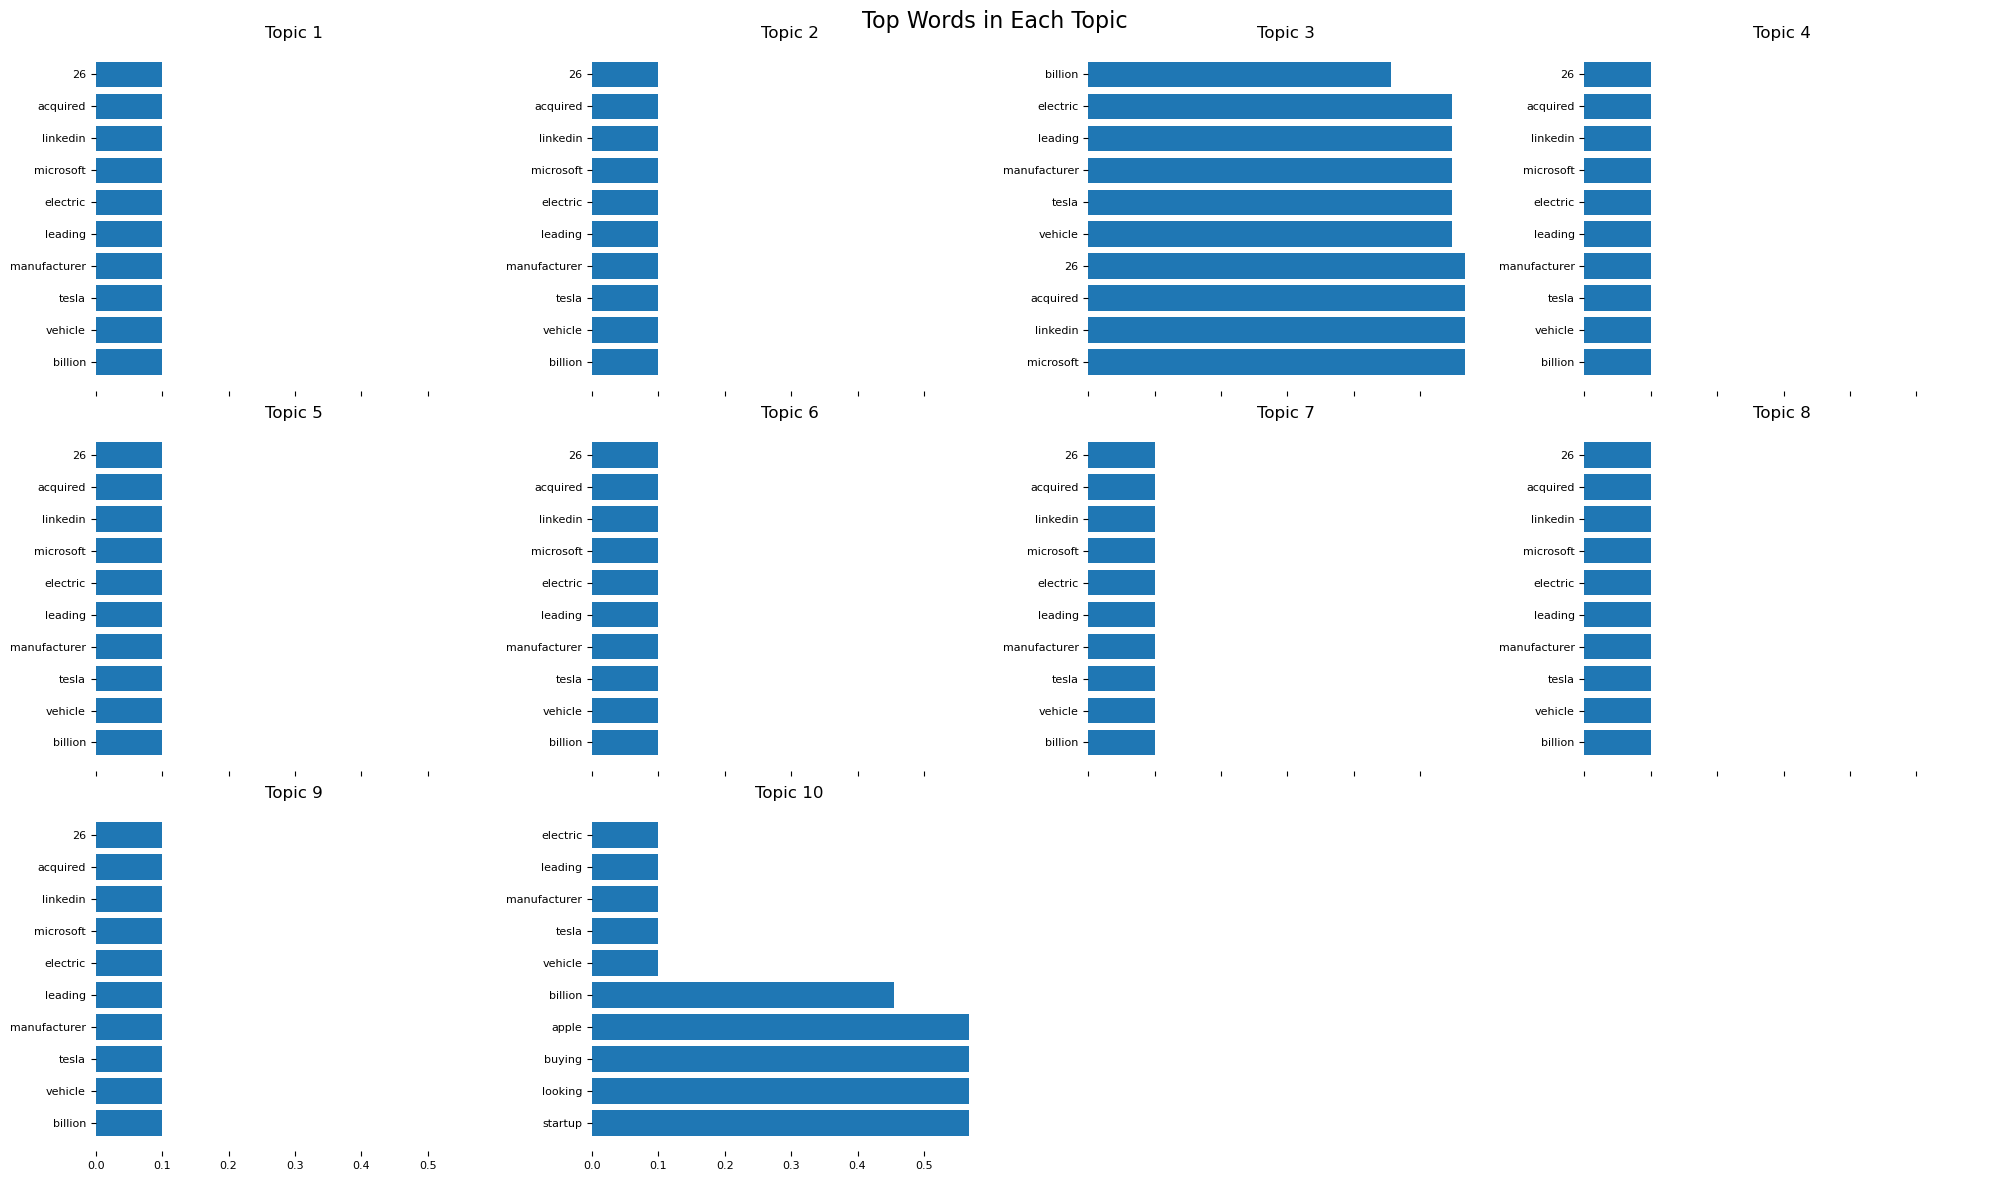

   Dominant_Topic  Perc_Contribution  \
0               9             0.7209   
1               2             0.7209   
2               2             0.7219   

                                      Topic_Keywords  index  \
0  electric, leading, manufacturer, tesla, vehicl...      0   
1  billion, electric, leading, manufacturer, tesl...      1   
2  billion, electric, leading, manufacturer, tesl...      2   

                                   processed_content  \
0  Apple is looking at buying U.K. startup for $1...   
1      Microsoft acquired LinkedIn for $26.2 billion   
2   Tesla is a leading electric vehicle manufacturer   

                                            entities  
0   [(Apple, ORG), (U.K., GPE), ($1 billion, MONEY)]  
1  [(Microsoft, ORG), (LinkedIn, GPE), ($26.2 bil...  
2                                     [(Tesla, ORG)]  


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for TF-IDF
texts = df['processed_content']

# Create the TF-IDF model
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 10  # Number of topics to find
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)

# Function to print the top words in each topic
def print_top_words(lda_model, feature_names, n_words=10):
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-n_words:]]
        print(f"Topic {topic_idx}: {' '.join(top_words)}")

# Print top words for each topic
print("Top words per topic:")
print_top_words(lda_model, tfidf_vectorizer.get_feature_names_out())

# Function to plot the top words for each topic
def plot_top_words(lda_model, feature_names, n_top_words):
    num_topics = lda_model.n_components
    num_cols = min(4, num_topics)  # Maximum 4 columns
    num_rows = np.ceil(num_topics / num_cols).astype(int)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), sharex=True)
    axes = axes.flatten() if num_topics > 1 else [axes]

    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-n_top_words:]]
        top_word_weights = [topic[i] for i in topic.argsort()[-n_top_words:]]
        
        ax = axes[topic_idx]
        ax.barh(top_words, top_word_weights)
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=8)
        for spine in ax.spines.values():
            spine.set_visible(False)

    for idx in range(num_topics, len(axes)):
        axes[idx].set_visible(False)

    fig.suptitle('Top Words in Each Topic', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Plot top words for each topic
plot_top_words(lda_model, tfidf_vectorizer.get_feature_names_out(), n_top_words=10)

# Assign topics to documents
def format_topics_sentences(ldamodel, doc_lda):
    topics_df = []
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    for i, topic_distribution in enumerate(doc_lda):
        topic_distribution = sorted(enumerate(topic_distribution), key=lambda x: x[1], reverse=True)
        
        dominant_topic = topic_distribution[0]
        dominant_topic_num = int(dominant_topic[0])
        dominant_topic_prob = round(dominant_topic[1], 4)
        
        # Extract top words for the dominant topic
        top_words_idx = lda_model.components_[dominant_topic_num].argsort()[-10:]  # Adjust number of top words as needed
        top_words = [feature_names[i] for i in top_words_idx]
        topic_keywords = ", ".join(top_words)
        
        topics_df.append([dominant_topic_num, dominant_topic_prob, topic_keywords])
    
    return pd.DataFrame(topics_df, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

# Use the function to create a DataFrame of topics for each document
df_topic_sents_keywords = format_topics_sentences(lda_model, lda_topic_matrix)

# Combine original DataFrame with the topic DataFrame
df_dominant_topic = pd.concat([df_topic_sents_keywords, df.reset_index()], axis=1)
print(df_dominant_topic)


<H2>12. Hierarchical Clustering</H2>

The goal of a cluster analysis technique known as hierarchical clustering is to create a hierarchy of clusters. This section uses a dendrogram to illustrate the outcomes of applying hierarchical clustering to the text data's TF-IDF matrix.

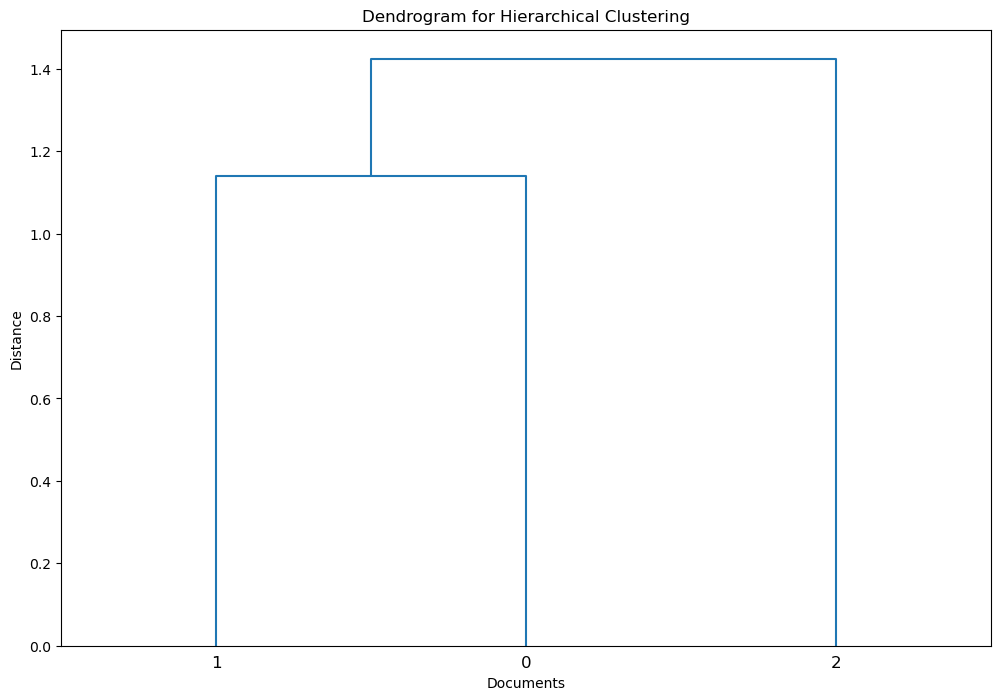

                                            Document  Cluster
0  Apple is looking at buying U.K. startup for $1...        1
1      Microsoft acquired LinkedIn for $26.2 billion        1
2   Tesla is a leading electric vehicle manufacturer        1


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df['processed_content'] contains the preprocessed text data

# Convert documents to TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['processed_content'])

# Convert the TF-IDF matrix to a dense array
dense_matrix = tfidf_matrix.todense()

# Compute the distance matrix
distance_matrix = 1 - (dense_matrix @ dense_matrix.T).A

# Perform hierarchical clustering
linked = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()

# Cluster the data into k clusters (e.g., k=2)
k = 2
clusters = fcluster(linked, k, criterion='maxclust')

# Create a DataFrame with the cluster labels
cluster_df = pd.DataFrame({'Document': df['processed_content'], 'Cluster': clusters})

print(cluster_df)


Plotting the hierarchical relationships among the documents based on their TF-IDF features resulted in a hierarchical clustering dendrogram. Understanding how the papers are put together at various degrees of similarity is made easier with the help of this visualization.


All documents were assigned to the same cluster (Cluster 1) when the data was clustered using hierarchical clustering, suggesting that the documents may be quite similar to one another.

<H2>13. K-Means Clustering and Cluster Evaluation</H2>

One common technique for dividing a dataset into a predetermined number of clusters is K-Means clustering. In this section, we examine two distinct cluster sizes (k=2 and k=3) and assess the clustering performance using multiple metrics, including the Calinski-Harabasz Index, Davies-Bouldin Index, and Silhouette Score.

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from collections import Counter

# Test with different number of clusters
for k in range(2, 4):  # Try 2 and 3 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)
    
    num_samples = tfidf_matrix.shape[0]
    num_clusters = len(set(clusters))

    cluster_counts = Counter(clusters)
    print(f"Number of clusters: {k}")
    print(f"Cluster counts: {cluster_counts}")

    if num_clusters > 1 and num_clusters < num_samples:
        # Convert sparse matrix to dense format
        dense_tfidf_matrix = tfidf_matrix.toarray()
        
        silhouette_avg = silhouette_score(dense_tfidf_matrix, clusters)
        db_index = davies_bouldin_score(dense_tfidf_matrix, clusters)
        ch_index = calinski_harabasz_score(dense_tfidf_matrix, clusters)

        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Davies-Bouldin Index: {db_index:.4f}")
        print(f"Calinski-Harabasz Index: {ch_index:.4f}")
    else:
        print("Clustering metrics cannot be calculated with the current number of clusters or samples.")


Number of clusters: 2
Cluster counts: Counter({1: 2, 0: 1})
Silhouette Score: 0.0538
Davies-Bouldin Index: 0.5169
Calinski-Harabasz Index: 1.2474
Number of clusters: 3
Cluster counts: Counter({2: 1, 1: 1, 0: 1})
Clustering metrics cannot be calculated with the current number of clusters or samples.


K-Means produced two different clusters when it tried to cluster the documents into two clusters. The following were the metrics for clustering quality:

Silhouette Score: 0.0538 (a low score indicates that there may not be enough space between the clusters or that there is low document similarity).
The Davies-Bouldin Index, which indicates a moderate degree of cluster separation, is 0.5169. Lower numbers denote better clustering.
1.2474 is the Calinski-Harabasz Index (lower values imply weak clustering, higher values indicate better-defined clusters).

The dataset's texts are fairly similar, according to both hierarchical and K-Means clustering, making it difficult to tell one cluster from another. The poor Silhouette and Calinski-Harabasz scores imply that more preprocessing or dimensionality reduction may be necessary for the text data in order to achieve better clustering results.


<H2>14. Dimensionality Reduction and Visualization with PCA</H2>

We can use Principal Component Analysis (PCA) to reduce the dimensionality of the TF-IDF matrix to two components to better comprehend the clustering results. This enables us to observe the clustering results in a two-dimensional plot and to understand how documents are distributed in the smaller feature space.

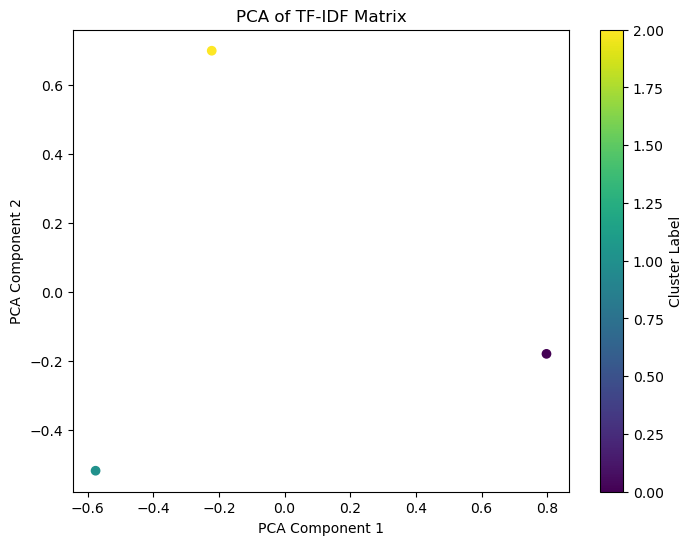

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.colorbar(label='Cluster Label')
plt.title('PCA of TF-IDF Matrix')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


<H2>15. Heatmap of Document Similarity</H2>

We can compute the cosine similarity matrix of the TF-IDF matrix to analyze the similarity between documents. The cosine of the angle that separates two vectors, which signifies their similarity, is measured by the cosine relationship. Documents with a higher cosine similarity score are more similar to one another.

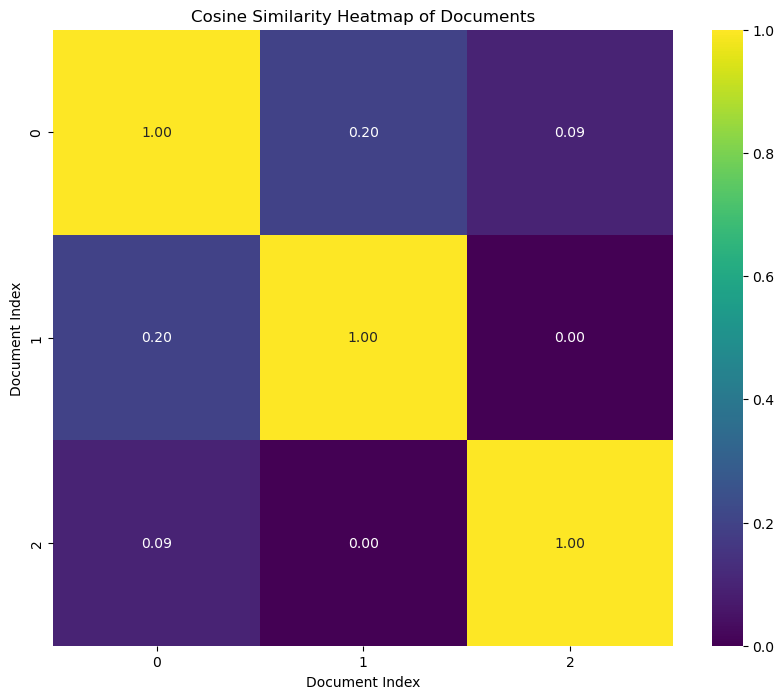

In [35]:
#Heatmap of Document Similarity
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis', annot=True, fmt='.2f')
plt.title('Cosine Similarity Heatmap of Documents')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()


The cosine similarity matrix, in which each cell reflects the similarity between two papers, is visualized in the heatmap. Darker hues indicate higher similarity scores, and color intensity represents similarity level. The identification of clusters or groupings of documents with related content is made easier by this visualization.

<H2>16. Assigning Topics to Documents</H2>

We must structure the themes and link them to each page in order to assign subjects to documents using the Latent Dirichlet Allocation (LDA) model. This entails determining which topic dominates each page and compiling a list of each topic's essential terms.

In [36]:
# Function to format topics and assign them to documents
def format_topics_sentences(ldamodel, doc_lda):
    topics_df = []
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    for i, topic_distribution in enumerate(doc_lda):
        topic_distribution = sorted(enumerate(topic_distribution), key=lambda x: x[1], reverse=True)
        
        dominant_topic = topic_distribution[0]
        dominant_topic_num = int(dominant_topic[0])
        dominant_topic_prob = round(dominant_topic[1], 4)
        
        # Extract top words for the dominant topic
        top_words_idx = lda_model.components_[dominant_topic_num].argsort()[-10:]  # Adjust number of top words as needed
        top_words = [feature_names[i] for i in top_words_idx]
        topic_keywords = ", ".join(top_words)
        
        topics_df.append([dominant_topic_num, dominant_topic_prob, topic_keywords])
    
    return pd.DataFrame(topics_df, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

# Assign topics to each document in the DataFrame
df_topics = format_topics_sentences(lda_model, lda_topic_matrix)

# Combine the original DataFrame with the topics DataFrame
df_final = pd.concat([df, df_topics], axis=1)

# Display the final DataFrame with assigned topics
df_final.head()


,processed_content,entities,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,Apple is looking at buying U.K. startup for $1...,"[(Apple, ORG), (U.K., GPE), ($1 billion, MONEY)]",9,0.7209,"electric, leading, manufacturer, tesla, vehicl..."
1,Microsoft acquired LinkedIn for $26.2 billion,"[(Microsoft, ORG), (LinkedIn, GPE), ($26.2 bil...",2,0.7209,"billion, electric, leading, manufacturer, tesl..."
2,Tesla is a leading electric vehicle manufacturer,"[(Tesla, ORG)]",2,0.7219,"billion, electric, leading, manufacturer, tesl..."


The final DataFrame, df_final, has the allocated topics, their contributions, and keywords for each topic added to the original document content. With this improved DataFrame, deeper insights into the dataset can be gained by carefully examining how papers relate to various themes.

<H1>Conclusion</H1>

We explored and examined 29 transcripts of Australian radio discourse in this investigation, paying particular attention to named entity recognition, topic modelling, sentiment analysis, and geographical variations. We were able to gain a greater understanding of the dynamics of radio communication throughout Australia by using our study, which provided important insights into the themes and attitudes that were common in many Australian regions. To get important insights, the methods employed in this analysis can be applied to different textual datasets.

Using a blend of machine learning algorithms, visualization strategies, and statistical approaches, we provide a thorough comprehension of the sentiment and content found in Australian radio discussion transcripts. For the purpose of making educated decisions and customizing information to suit the interests and preferences of various audiences throughout Australia, media professionals, scholars, and legislators need to be aware of these findings.